# Model and Data Analysis for All Crops Data

In [100]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler,StandardScaler
import matplotlib.pyplot as plt
import tensorflow as tf

In [101]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Read Dataset

# Read the Processed data

In [102]:
df=pd.read_csv('/content/drive/MyDrive/TDS_HW6/Data_ft_1961_2020.csv',index_col=0)
df.head()

,Item Code (CPC),Year,Area harvested,Production,Yield,Precipitation,Mean Temperature,Minimum Temperature,Maximum Temperature
0,111.0,1961,12927000.0,10997000.0,8507.0,1286.98,24.05,18.14,30.01
1,111.0,1962,13570000.0,12072000.0,8896.0,1169.53,24.1,18.03,30.22
2,111.0,1963,13590000.0,10776000.0,7929.0,1149.64,24.25,18.16,30.38
3,111.0,1964,13499000.0,9853000.0,7299.0,1189.87,24.25,18.14,30.4
4,111.0,1965,13422000.0,12257000.0,9132.0,953.51,24.34,18.23,30.5


In [103]:
df.head()

,Item Code (CPC),Year,Area harvested,Production,Yield,Precipitation,Mean Temperature,Minimum Temperature,Maximum Temperature
0,111.0,1961,12927000.0,10997000.0,8507.0,1286.98,24.05,18.14,30.01
1,111.0,1962,13570000.0,12072000.0,8896.0,1169.53,24.1,18.03,30.22
2,111.0,1963,13590000.0,10776000.0,7929.0,1149.64,24.25,18.16,30.38
3,111.0,1964,13499000.0,9853000.0,7299.0,1189.87,24.25,18.14,30.4
4,111.0,1965,13422000.0,12257000.0,9132.0,953.51,24.34,18.23,30.5


# Label Encoding the Item Code(Differs for different crops)

In [104]:
from sklearn import preprocessing
  
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
  
# Encode labels in column 'Item Code (CPC)'.
df['Item Code (Encoded)']= label_encoder.fit_transform(df['Item Code (CPC)'])
  
df['Item Code (Encoded)'].unique()

array([ 0,  1,  2,  3,  4,  5,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35,
       36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47,  6,  7, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79])

In [105]:
df.head()

,Item Code (CPC),Year,Area harvested,Production,Yield,Precipitation,Mean Temperature,Minimum Temperature,Maximum Temperature,Item Code (Encoded)
0,111.0,1961,12927000.0,10997000.0,8507.0,1286.98,24.05,18.14,30.01,0
1,111.0,1962,13570000.0,12072000.0,8896.0,1169.53,24.1,18.03,30.22,0
2,111.0,1963,13590000.0,10776000.0,7929.0,1149.64,24.25,18.16,30.38,0
3,111.0,1964,13499000.0,9853000.0,7299.0,1189.87,24.25,18.14,30.4,0
4,111.0,1965,13422000.0,12257000.0,9132.0,953.51,24.34,18.23,30.5,0


# Data Analysis

In [106]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4718 entries, 0 to 4717
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Item Code (CPC)      4718 non-null   float64
 1   Year                 4718 non-null   int64  
 2   Area harvested       4718 non-null   float64
 3   Production           4718 non-null   float64
 4   Yield                4718 non-null   float64
 5   Precipitation        4718 non-null   float64
 6   Mean Temperature     4718 non-null   float64
 7   Minimum Temperature  4718 non-null   float64
 8   Maximum Temperature  4718 non-null   float64
 9   Item Code (Encoded)  4718 non-null   int64  
dtypes: float64(8), int64(2)
memory usage: 405.5 KB


Null Values in Columns

In [107]:
print(df.isnull().sum())

Item Code (CPC)        0
Year                   0
Area harvested         0
Production             0
Yield                  0
Precipitation          0
Mean Temperature       0
Minimum Temperature    0
Maximum Temperature    0
Item Code (Encoded)    0
dtype: int64


In [108]:
df.describe()

,Item Code (CPC),Year,Area harvested,Production,Yield,Precipitation,Mean Temperature,Minimum Temperature,Maximum Temperature,Item Code (Encoded)
count,4718.0,4718.0,4718.0,4718.0,4718.0,4718.0,4718.0,4718.0,4718.0,4718.0
mean,1316.3563798219586,1990.765154726579,2231011.480712166,7608293.338914795,65867.33976261127,1112.558969902501,24.602513777024164,18.62940652818991,30.623291649003814,39.37049597286986
std,449.23210351379134,17.229497507539712,5894296.12563013,30615487.820160855,92492.85094674396,97.88110556196311,0.3556392026242085,0.3854497848345317,0.3428157175743565,23.2474607066372
min,111.0,1961.0,200.0,300.0,382.0,874.32,23.82,17.8,29.9,0.0
25%,1241.9,1976.0,60641.25,165080.75,7793.25,1034.04,24.32,18.3,30.38,19.0
50%,1344.02,1991.0,308000.0,794850.0,28231.0,1114.26,24.62,18.66,30.64,39.0
75%,1620.0,2006.0,1103350.0,3755400.0,94921.25,1187.06,24.83,18.89,30.88,60.0
max,1970.0,2020.0,45537400.0,405416180.0,801984.0,1320.91,25.48,19.49,31.52,79.0


# Feature and Label

In [109]:
X=df.loc[:,['Item Code (Encoded)','Area harvested','Production','Precipitation','Mean Temperature',	'Minimum Temperature','Maximum Temperature']]
Y=df.loc[:,['Yield']]

# Feature Importance

In [110]:
from sklearn.feature_selection import SelectKBest,chi2
bestfeatures = SelectKBest(score_func=chi2, k=7)
fit = bestfeatures.fit(X,Y)

In [111]:
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

In [112]:
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  
print(featureScores.nlargest(5,'Score'))

                 Specs              Score
2           Production  580207624225.1035
1       Area harvested   71943403314.0281
0  Item Code (Encoded)  62427.58775452292
3        Precipitation  35317.03818532293
5  Minimum Temperature 34.873492713652126


# Normalize/Standardize the Dataset

In [113]:
#norm = MinMaxScaler()
norm =StandardScaler()

# transform data
df.iloc[:,1:] = norm.fit_transform(df.iloc[:,1:])

In [114]:
df.head()

,Item Code (CPC),Year,Area harvested,Production,Yield,Precipitation,Mean Temperature,Minimum Temperature,Maximum Temperature,Item Code (Encoded)
0,111.0,-1.727752631214661,1.814826062596067,0.11069775740392183,-0.6202254447224523,1.7821572066584537,-1.5537441768771438,-1.2698370101188048,-1.78917308270866,-1.6937191336493012
1,111.0,-1.6697064813765132,1.923926138399717,0.1458144261246978,-0.6160192684864758,0.5821048746372999,-1.4131373502704279,-1.5552481419026156,-1.1765341400797868,-1.6937191336493012
2,111.0,-1.6116603315383655,1.9273196088757247,0.10347842364830186,-0.6264752387183249,0.3788776214750981,-0.9913168704502899,-1.2179440770672036,-0.7097616123625439,-1.6937191336493012
3,111.0,-1.5536141817002178,1.9118793182098894,0.07332708855130073,-0.6332872979179783,0.7899300294547554,-0.9913168704502899,-1.2698370101188048,-0.6514150463978898,-1.6937191336493012
4,111.0,-1.49556803186207,1.8988144568772596,0.15185775981152902,-0.6134674494847009,-1.6250922710690392,-0.7382245825582051,-1.036318811386595,-0.3596822165746091,-1.6937191336493012


# Correlation Matrix (Heatmap)

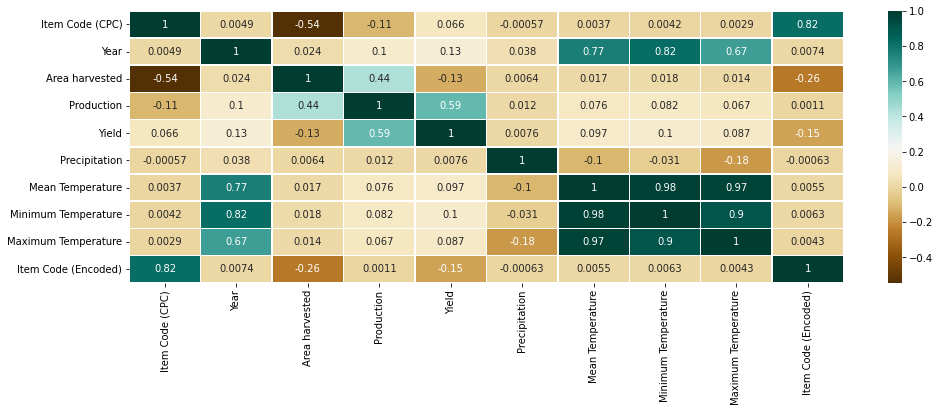

In [115]:
import seaborn as sb
plt.figure(figsize = (16,5))

#ax = sb.heatmap(df1.iloc[:, 1:6:], annot=True, linewidths=.5)
corr = df.corr()
ax= sb.heatmap(corr, cmap="BrBG",annot=True, linewidths=.5)

In [116]:
# Using only the Features with High Importance and less Redundance

X=X[['Area harvested','Production','Precipitation','Minimum Temperature']]

# Train test split

In [117]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=42)

We use Mean Squared Error and R2 score to compare and evaluate our models.

**R2 Score:**
The r2 score varies between 0 and 100%. It is closely related to the MSE.

It is  (total variance explained by model) / total variance. So if it is 100%, the two variables are perfectly correlated, i.e., with no variance at all. A low value would show a low level of correlation, meaning a regression model that is not valid, but not in all cases.

**Mean Squared Error:**
Mean square error (MSE) is the average of the square of the errors. The larger the number the larger the error. Error in this case means the difference between the observed values y1, y2, y3, … and the predicted ones pred(y1), pred(y2), pred(y3), … We square each difference (pred(yn) – yn)) ** 2.

# Linear Regression

In [118]:
from sklearn.linear_model import LinearRegression

regr1 = LinearRegression()

regr1.fit(X_train, y_train)

print(regr1.score(X_test, y_test))

0.5191615539423922


In [119]:
y_pred1=regr1.predict(X_test)

In [120]:
from sklearn.metrics import r2_score, mean_squared_error,accuracy_score

print('Coefficient of Determination (R2 Score) =',r2_score(y_test, y_pred1))

print('Mean Squared Error = ',mean_squared_error(y_test, y_pred1))

Coefficient of Determination (R2 Score) = 0.5191615539423922
Mean Squared Error =  4408763690.649902


# Bayesian Ridge regressor

In [121]:
from sklearn.linear_model import BayesianRidge

regr2 = BayesianRidge().fit(X_train, y_train)

regr2.score(X_test, y_test)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.5154728882541151

In [122]:
y_pred2=regr2.predict(X_test)

print('Coefficient of Determination (R2 Score)=',r2_score(y_test, y_pred2))

print('Mean Squared Error= ',mean_squared_error(y_test, y_pred2))

Coefficient of Determination (R2 Score)= 0.5154728882541151
Mean Squared Error=  4442584728.644594


# Decision Tree Regressor

In [123]:
from sklearn.tree import DecisionTreeRegressor

regr3 = DecisionTreeRegressor(max_depth=2).fit(X_train, y_train)

regr3.score(X_test, y_test)

0.36654305662693265

In [124]:
y_pred3=regr3.predict(X_test)

print('Coefficient of Determination (R2 Score)=',r2_score(y_test, y_pred3))

print('Mean Squared Error= ',mean_squared_error(y_test, y_pred3))

Coefficient of Determination (R2 Score)= 0.36654305662693265
Mean Squared Error=  5808108720.155581


# Lasso Regression

In [125]:
from sklearn import linear_model

regr4 = linear_model.Lasso(alpha=0.1).fit(X_train, y_train)

regr4.score(X_test, y_test)

0.5191612235135079

In [126]:
y_pred4=regr4.predict(X_test)

print('Coefficient of Determination (R2 Score)=',r2_score(y_test, y_pred4))

print('Mean Squared Error= ',mean_squared_error(y_test, y_pred4))

Coefficient of Determination (R2 Score)= 0.5191612235135079
Mean Squared Error=  4408766720.322092


# Random Forest Regressor

In [127]:
from sklearn.ensemble import RandomForestRegressor

regr5 = RandomForestRegressor(max_depth=3).fit(X_train, y_train)

regr5.score(X_test, y_test)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


0.5932759295585954

In [128]:
y_pred5=regr5.predict(X_test)

print('Coefficient of Determination (R2 Score)=',r2_score(y_test, y_pred5))

print('Mean Squared Error= ',mean_squared_error(y_test, y_pred5))

Coefficient of Determination (R2 Score)= 0.5932759295585954
Mean Squared Error=  3729215765.8719454


# Polynomial Regression

In [129]:
from sklearn.preprocessing import PolynomialFeatures

poly_reg=PolynomialFeatures(degree=2)

X_poly=poly_reg.fit_transform(X_train)

regr6=LinearRegression().fit(X_poly,y_train)


In [130]:
X_test_poly=poly_reg.fit_transform(X_test)

regr6.score(X_test_poly, y_test)

0.6024162546543175

In [131]:
y_pred6=regr6.predict(X_test_poly)

print('Coefficient of Determination (R2 Score)=',r2_score(y_test, y_pred6))

print('Mean Squared Error= ',mean_squared_error(y_test, y_pred6))

Coefficient of Determination (R2 Score)= 0.6024162546543175
Mean Squared Error=  3645408961.8753953


# K nearest neighbors

In [132]:
from sklearn import neighbors
from math import sqrt

mse_val = [] 
r2_val=[]

# To find the Optimum K value for KNN Algorithm we use different K values on the model and obsereve the errors to find the best
for K in range(20):
    K = K+1
    regr7 = neighbors.KNeighborsRegressor(n_neighbors = K)

    regr7.fit(X_train, y_train)  #fit the model
    y_pred7=regr7.predict(X_test) #make prediction on test set
    #error = mean_squared_error(y_test,y_pred9) #calculate rmse
    mse_val.append(mean_squared_error(y_test,y_pred7)) #store mse values
    r2_val.append(r2_score(y_test, y_pred7))
    print('MSE value for k= ' , K , 'is:', mean_squared_error(y_test,y_pred7))
    print('R2 score value for k= ' , K , 'is:', r2_score(y_test, y_pred7))
    print('\n')

MSE value for k=  1 is: 318997309.1779062
R2 score value for k=  1 is: 0.9652088020124635


MSE value for k=  2 is: 374814557.8142261
R2 score value for k=  2 is: 0.9591211364035266


MSE value for k=  3 is: 405621224.9627489
R2 score value for k=  3 is: 0.9557612307702705


MSE value for k=  4 is: 455244870.51589596
R2 score value for k=  4 is: 0.9503490657531042


MSE value for k=  5 is: 518099197.0847784
R2 score value for k=  5 is: 0.9434939066118975


MSE value for k=  6 is: 570174658.1305217
R2 score value for k=  6 is: 0.9378143362098654


MSE value for k=  7 is: 626710997.8142031
R2 score value for k=  7 is: 0.9316482434848369


MSE value for k=  8 is: 678946389.7455543
R2 score value for k=  8 is: 0.925951230342865


MSE value for k=  9 is: 726066828.6236907
R2 score value for k=  9 is: 0.9208120756506397


MSE value for k=  10 is: 755169291.9505907
R2 score value for k=  10 is: 0.9176380377061174


MSE value for k=  11 is: 796898505.5969203
R2 score value for k=  11 is: 0.913

In [133]:
max(r2_val),min(mse_val)

(0.9652088020124635, 318997309.1779062)

# ANN

In [134]:
import keras

from keras.losses import MeanSquaredError
from keras.optimizers import Adam

learning_rate = 0.01

ann = tf.keras.models.Sequential()

ann.add(tf.keras.layers.Dense(units=16,activation="relu"))

#Adding Second Hidden Layer
ann.add(tf.keras.layers.Dense(units=8,activation="relu"))

#Adding third Hidden Layer
ann.add(tf.keras.layers.Dense(units=2,activation="relu"))  #kernel_initializer='normal', activation='linear'

#Adding Output Layer
ann.add(tf.keras.layers.Dense(units=1,kernel_initializer='normal', activation='linear'))

msle =  MeanSquaredError()

ann.compile(
    loss=msle, 
    optimizer=Adam(learning_rate=learning_rate), 
    metrics=[msle]
)

In [135]:
history = ann.fit(
    X_train, y_train, 
    epochs=100, 
    batch_size=64,
    validation_split=0.2
)

Epoch 1/100
40/40 [==============================] - 1s 9ms/step - loss: 10789874688.0000 - mean_squared_error: 10890635264.0000 - val_loss: 7844660224.0000 - val_mean_squared_error: 7841008640.0000
Epoch 2/100
40/40 [==============================] - 0s 4ms/step - loss: 8251267072.0000 - mean_squared_error: 8217254912.0000 - val_loss: 9917744128.0000 - val_mean_squared_error: 9866037248.0000
Epoch 3/100
40/40 [==============================] - 0s 4ms/step - loss: 10377972736.0000 - mean_squared_error: 10357252096.0000 - val_loss: 7768430080.0000 - val_mean_squared_error: 7740983808.0000
Epoch 4/100
40/40 [==============================] - 0s 3ms/step - loss: 7740884992.0000 - mean_squared_error: 7697009152.0000 - val_loss: 6624812544.0000 - val_mean_squared_error: 6611902464.0000
Epoch 5/100
40/40 [==============================] - 0s 3ms/step - loss: 7575554048.0000 - mean_squared_error: 7649223680.0000 - val_loss: 6290376192.0000 - val_mean_squared_error: 6281854464.0000
Epoch 6/100

In [136]:
y_pred8=ann.predict(X_test)

print('Coefficient of Determination (R2 Score)=',r2_score(y_test, y_pred8))

print('Mean Squared Error= ',mean_squared_error(y_test, y_pred8))

49/49 [==============================] - 0s 1ms/step
Coefficient of Determination (R2 Score)= -0.507512352180933
Mean Squared Error=  13822242742.846851


# Model Comparison

In [137]:
comp=pd.DataFrame({'Models':['Linear Regression','Bayesian Ridge regressor', 
                             'Decision Tree Regressor','Lasso Regression',
                             'Random Forest Regressor','Polynomial Regression', 
                             'K Nearest Neighbor', 'Artificial Neural Network'],
                   
                   'Coefficient of Determination (R2 Score) ':[r2_score(y_test, y_pred1)*100,
                                                               r2_score(y_test, y_pred2)*100,
                                                               r2_score(y_test, y_pred3)*100,
                                                               r2_score(y_test, y_pred4)*100,
                                                               r2_score(y_test, y_pred5)*100,
                                                               r2_score(y_test, y_pred6)*100,
                                                               #r2_score(y_test, y_pred7)*100,
                                                               max(r2_val)*100,
                                                               r2_score(y_test, y_pred8)*100
                                                               ],
                   'Mean Squared Error':[mean_squared_error(y_test, y_pred1),
                                         mean_squared_error(y_test, y_pred2),
                                         mean_squared_error(y_test, y_pred3),
                                         mean_squared_error(y_test, y_pred4),
                                         mean_squared_error(y_test, y_pred5),
                                         mean_squared_error(y_test, y_pred6),
                                         #mean_squared_error(y_test, y_pred7),
                                         min(mse_val),
                                         mean_squared_error(y_test, y_pred8)
                                          ] } )

In [138]:
comp
comp.style.format("{:.1f}")
pd.set_option('display.float_format', str)

In [139]:
comp

,Models,Coefficient of Determination (R2 Score),Mean Squared Error
0,Linear Regression,51.91615539423922,4408763690.649902
1,Bayesian Ridge regressor,51.547288825411506,4442584728.644594
2,Decision Tree Regressor,36.65430566269327,5808108720.155581
3,Lasso Regression,51.91612235135079,4408766720.322092
4,Random Forest Regressor,59.327592955859544,3729215765.8719454
5,Polynomial Regression,60.241625465431746,3645408961.8753953
6,K Nearest Neighbor,96.52088020124636,318997309.1779062
7,Artificial Neural Network,-50.751235218093306,13822242742.846851


# Best Model 

In [140]:
r2_df =comp.loc[comp.iloc[:,1] == comp.iloc[:,1].max()]

In [141]:
r2_df

,Models,Coefficient of Determination (R2 Score),Mean Squared Error
6,K Nearest Neighbor,96.52088020124636,318997309.1779062


In [142]:
mse_df=comp.loc[comp.iloc[:,2] == comp.iloc[:,2].min()]

In [143]:
mse_df

,Models,Coefficient of Determination (R2 Score),Mean Squared Error
6,K Nearest Neighbor,96.52088020124636,318997309.1779062


**KNN is the best model with least Mean Squared Error and Maximum R2 score**